In [1]:
from pyvis.network import Network
import pandas as pd

In [2]:
df_edges = pd.read_csv('2015_2020_edges_unam.csv')

In [3]:
df_edges.columns

Index(['source', 'target'], dtype='object')

In [4]:
nodes = set(df_edges['source'].drop_duplicates().to_list() + df_edges['target'].drop_duplicates().to_list())

In [5]:
nt = Network(notebook=True)
nt.add_nodes(nodes)
nt.add_edges(df_edges.values)
nt.barnes_hut()
nt.show('nt.html')

In [6]:
nt = Network(notebook=True)
nt.add_nodes(nodes)
nt.add_edges(df_edges.values)
#nt.barnes_hut()
nt.force_atlas_2based()
nt.show('nt.html')

# Colorear con centralidad 

In [7]:
import networkx as nx
import matplotlib
from matplotlib import cm

In [8]:
G = nx.Graph()

In [9]:
G.add_edges_from(df_edges.values)

In [10]:
df_eigenvector_centrality = pd.json_normalize(nx.eigenvector_centrality(G)).T.reset_index()

In [11]:
df_eigenvector_centrality.columns

Index(['index', 0], dtype='object')

In [12]:
df_eigenvector_centrality.columns = ['nodo','eigenvector_centrality']

<AxesSubplot:>

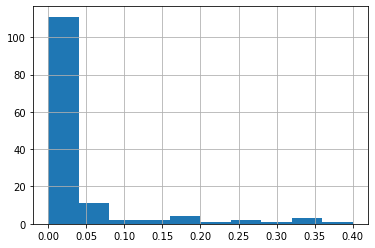

In [13]:
df_eigenvector_centrality['eigenvector_centrality'].hist()

In [14]:
def color_map_color(value, cmap_name='viridis', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [15]:
min_ = df_eigenvector_centrality['eigenvector_centrality'].min()
max_ = df_eigenvector_centrality['eigenvector_centrality'].max()
df_eigenvector_centrality['color'] = df_eigenvector_centrality['eigenvector_centrality'].map(lambda x: color_map_color(x,vmin=min_,vmax = max_))

In [16]:
nt = Network(notebook=True)
nt.add_nodes(df_eigenvector_centrality['nodo'],color = df_eigenvector_centrality['color'])
nt.add_edges(df_edges.values)
#nt.barnes_hut()
nt.force_atlas_2based()
nt.show('nt.html')

In [17]:
df_eigenvector_centrality

,nodo,eigenvector_centrality,color
0,adrian duran chavesti,2.439709e-05,#440154
1,hector benitez perez,1.581051e-04,#440154
2,alejandro dorantes cruz,1.638728e-01,#297a8e
3,alejandro pimentel alarcon,3.430045e-01,#a0da39
4,gemma bel enguix,3.205399e-01,#7cd250
...,...,...,...
133,malaquias lopez cervantes,3.202614e-27,#440154
134,monica vazquez hernandez,6.931911e-06,#440154
135,pedro acevedo contla,6.931911e-06,#440154
136,susana gomez gomez,3.202614e-27,#440154
